# Data Engineering Project
## Data Analyzers
### Islam Nasr
### Gaser Khaled
### Kariman Hossam
### Marwan Karim 

# 1) Working on the 250 Countries Dataset

In [77]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [78]:
# Function to calculate the percentage of missing values in a given df
def calculate_missingdata_pct(df):
    missingdata = pd.DataFrame(columns=['Category', 'Percentage'])
    for col in df.columns:
        percentage = 100*df[col].isna().sum()/df.shape[0]
        missingdata = missingdata.append({'Category' : col, 'Percentage' : percentage}, ignore_index=True)
    return missingdata

In [79]:
df_countryData = pd.read_csv('./data/250 Country Data.csv')
df_countryData.head(5)

,Unnamed: 0,name,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%)
0,0,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.8,3.1% (2013 est.).,28.1% (2000 est.),6.8% (2013 est.).,35% (2008 est.).
1,1,Åland Islands,Europe,Northern Europe,28875,1580.0,NaN,NaN,NaN,NaN,NaN
2,2,Albania,Europe,Southern Europe,2886026,28748.0,34.5,.7% (2013 est.).,98.7% (2011 est.),1.7% (2013 est.).,16.9% official rate (2013 est.). Note: These a...
3,3,Algeria,Africa,Northern Africa,40400000,2381741.0,35.3,3.1%.,79%,3.9%.,10.3%.
4,4,American Samoa,Oceania,Polynesia,57100,199.0,NaN,3%.,97% (1980 est.),NaN,NaN


In [80]:
df_countryData.rename(columns={'name': 'Country'}, inplace=True)
df_countryData.drop('Unnamed: 0', inplace=True, axis=1)
df_countryData.columns

Index(['Country', 'region', 'subregion', 'population', 'area', 'gini',
       'Real Growth Rating(%)', 'Literacy Rate(%)', 'Inflation(%)',
       'Unemployement(%)'],
      dtype='object')

In [81]:
df_countryData.rename(columns={
    'region': 'Region',
    'subregion': 'Subregion',
    'population': 'Population',
    'area': 'Area',
    'gini': 'Gini',
    'Real Growth Rating(%)': 'Real Growth Rating',
    'Literacy Rate(%)': 'Literacy Rate',
    'Inflation(%)': 'Inflation',
    'Unemployement(%)': 'Unemployment'
    }, inplace=True)
df_countryData.columns

Index(['Country', 'Region', 'Subregion', 'Population', 'Area', 'Gini',
       'Real Growth Rating', 'Literacy Rate', 'Inflation', 'Unemployment'],
      dtype='object')

In [83]:
calculate_missingdata_pct(df_countryData)

,Category,Percentage
0,Country,0.0
1,Region,0.8
2,Subregion,1.2
3,Population,0.0
4,Area,4.0
5,Gini,38.8
6,Real Growth Rating,31.6
7,Literacy Rate,29.6
8,Inflation,32.8
9,Unemployment,32.8


In [82]:
df_countryData.isna().sum()

Country                0
Region                 2
Subregion              3
Population             0
Area                  10
Gini                  97
Real Growth Rating    79
Literacy Rate         74
Inflation             82
Unemployment          82
dtype: int64

# 2) Working on the Happiness Datasets

In [85]:
df_happiness2015 = pd.read_csv('./data/Happiness_Dataset/2015.csv')
print(df_happiness2015.columns)
df_happiness2015.head(5)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [86]:
df_happiness2015.rename(columns={
    'Happiness Rank': 'Happiness_Rank',  
    'Happiness Score': 'Happiness_Score' , 
    'Standard Error': 'Standard_Error', 
    'Economy (GDP per Capita)': 'Economy_GDP_per_Capita',  
    'Health (Life Expectancy)': 'Health_Life_Expectancy', 
    'Trust (Government Corruption)': 'Trust_Government_Corruption',
    'Dystopia Residual': 'Dystopia_Residual'
    }, inplace=True)
df_happiness2015.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard_Error', 'Economy_GDP_per_Capita', 'Family',
       'Health_Life_Expectancy', 'Freedom', 'Trust_Government_Corruption',
       'Generosity', 'Dystopia_Residual'],
      dtype='object')

In [87]:
df_happiness2016 = pd.read_csv('./data/Happiness_Dataset/2016.csv')
df_happiness2016.rename(columns={
    'Happiness Rank': 'Happiness_Rank',  
    'Happiness Score': 'Happiness_Score' ,
    'Lower Confidence Interval': 'Lower_Confidence_Interval', 
    'Upper Confidence Interval': 'Upper_Confidence_Interval', 
    'Economy (GDP per Capita)': 'Economy_GDP_per_Capita',  
    'Health (Life Expectancy)': 'Health_Life_Expectancy', 
    'Trust (Government Corruption)': 'Trust_Government_Corruption',
    'Dystopia Residual': 'Dystopia_Residual'
    }, inplace=True)
df_happiness2017 = pd.read_csv('./data/Happiness_Dataset/2017.csv')
df_happiness2017.rename(columns={
    'Happiness.Rank': 'Happiness_Rank',  
    'Happiness.Score': 'Happiness_Score' , 
    'Whisker.low': 'Lower_Confidence_Interval', 
    'Whisker.high': 'Upper_Confidence_Interval', 
    'Economy..GDP.per.Capita.': 'Economy_GDP_per_Capita',  
    'Health..Life.Expectancy.': 'Health_Life_Expectancy', 
    'Trust..Government.Corruption.': 'Trust_Government_Corruption',
    'Dystopia.Residual': 'Dystopia_Residual'
    }, inplace=True)
df_happiness2018 = pd.read_csv('./data/Happiness_Dataset/2018.csv')
df_happiness2018.rename(columns={
    'Overall rank': 'Happiness_Rank',
    'Country or region':'Country',  
    'Score': 'Happiness_Score' , 
    'GDP per capita': 'Economy_GDP_per_Capita',  
    'Healthy life expectancy': 'Health_Life_Expectancy',
    'Freedom to make life choices':'Freedom', 
    'Perceptions of corruption': 'Trust_Government_Corruption',
    'Social support':'Family'
    }, inplace=True)
df_happiness2019 = pd.read_csv('./data/Happiness_Dataset/2015.csv')
df_happiness2019.rename(columns={
    'Happiness Rank': 'Happiness_Rank',
    'Happiness Score': 'Happiness_Score' ,
    'Standard Error':'Standard_Error', 
    'Economy (GDP per Capita)': 'Economy_GDP_per_Capita',  
    'Health (Life Expectancy)': 'Health_Life_Expectancy', 
    'Trust (Government Corruption)': 'Trust_Government_Corruption',
    'Dystopia Residual': 'Dystopia_Residual'
    }, inplace=True)

In [88]:
countriesIn2015 = df_happiness2015['Country'].unique()
countriesIn2016 = df_happiness2016['Country'].unique()
countriesIn2017 = df_happiness2017['Country'].unique()
countriesIn2018 = df_happiness2018['Country'].unique()
countriesIn2019 = df_happiness2019['Country'].unique()
print('Count of countries in 2015:', len(countriesIn2015))
print('Count of countries in 2016:', len(countriesIn2016))
print('Count of countries in 2017:', len(countriesIn2017))
print('Count of countries in 2018:', len(countriesIn2018))
print('Count of countries in 2019:', len(countriesIn2019))

Count of countries in 2015: 158
Count of countries in 2016: 157
Count of countries in 2017: 155
Count of countries in 2018: 156
Count of countries in 2019: 158


In [89]:
df_happiness2015["Year"] = 2015
df_happiness2016["Year"] = 2016
df_happiness2017["Year"] = 2017
df_happiness2018["Year"] = 2018
df_happiness2019["Year"] = 2019
df_happiness = pd.concat([df_happiness2015, df_happiness2016, df_happiness2017, df_happiness2018, df_happiness2019])
df_happiness.sort_values(by=['Country','Year'], inplace=True)
df_happiness

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual,Year,Lower_Confidence_Interval,Upper_Confidence_Interval
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,1.952100,2015,NaN,NaN
153,Afghanistan,Southern Asia,154,3.360,NaN,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2.145580,2016,3.288000,3.432000
140,Afghanistan,NaN,141,3.794,NaN,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2.150801,2017,3.714338,3.873661
144,Afghanistan,NaN,145,3.632,NaN,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000,NaN,2018,NaN,NaN
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,1.952100,2019,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Zimbabwe,Sub-Saharan Africa,115,4.610,0.04290,0.271000,1.032760,0.334750,0.258610,0.080790,0.189870,2.441910,2015,NaN,NaN
130,Zimbabwe,Sub-Saharan Africa,131,4.193,NaN,0.350410,0.714780,0.159500,0.254290,0.085820,0.185030,2.442700,2016,4.101000,4.285000
137,Zimbabwe,NaN,138,3.875,NaN,0.375847,1.083096,0.196764,0.336384,0.095375,0.189143,1.597970,2017,3.771300,3.978700
143,Zimbabwe,NaN,144,3.692,NaN,0.357000,1.094000,0.248000,0.406000,0.099000,0.132000,NaN,2018,NaN,NaN


### Checking to see if the data has NaN values.

In [90]:
calculate_missingdata_pct(df_happiness)

,Category,Percentage
0,Country,0.000000
1,Region,39.668367
2,Happiness_Rank,0.000000
3,Happiness_Score,0.000000
4,Standard_Error,59.693878
5,Economy_GDP_per_Capita,0.000000
6,Family,0.000000
7,Health_Life_Expectancy,0.000000
8,Freedom,0.000000
9,Trust_Government_Corruption,0.127551


In [91]:
df_happiness.isna().sum()

Country                          0
Region                         311
Happiness_Rank                   0
Happiness_Score                  0
Standard_Error                 468
Economy_GDP_per_Capita           0
Family                           0
Health_Life_Expectancy           0
Freedom                          0
Trust_Government_Corruption      1
Generosity                       0
Dystopia_Residual              156
Year                             0
Lower_Confidence_Interval      472
Upper_Confidence_Interval      472
dtype: int64

### Changing the names of some countries with inconsitent names in all years.

In [92]:
df_happiness['Country'] = df_happiness['Country'].replace({'&':'and'},regex=True)
df_happiness['Country'] = df_happiness['Country'].replace({
    'Northern Cyprus': 'North Cyprus',
    'Somaliland region': 'Somaliland Region',
    'Taiwan Province of China': 'Taiwan',
    'Hong Kong S.A.R., China': 'Hong Kong'
    })

### Finding the common columns in all the tables of the happiness dataset.

In [93]:
columnsIn2015Happiness = np.array(df_happiness2015.columns)
columnsIn2016Happiness = np.array(df_happiness2016.columns)
columnsIn2017Happiness = np.array(df_happiness2017.columns)
columnsIn2018Happiness = np.array(df_happiness2018.columns)
columnsIn2019Happiness = np.array(df_happiness2019.columns)

columnsInAllHappinessDatasets = np.intersect1d(
    np.intersect1d(
        np.intersect1d(
            np.intersect1d(
                columnsIn2015Happiness,
                columnsIn2016Happiness
                ),
                    columnsIn2017Happiness
                    ),
                        columnsIn2018Happiness
                        ),
                            columnsIn2019Happiness
                            )
print(columnsInAllHappinessDatasets)

['Country' 'Economy_GDP_per_Capita' 'Family' 'Freedom' 'Generosity'
 'Happiness_Rank' 'Happiness_Score' 'Health_Life_Expectancy'
 'Trust_Government_Corruption' 'Year']


### Removing the uncommon columns.


In [94]:
df_happiness = df_happiness[columnsInAllHappinessDatasets]

### Investigating whether all countries have records in all the 5 years.

In [95]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_happiness.groupby('Country').Country.count())

Country
Afghanistan                 5
Albania                     5
Algeria                     5
Angola                      5
Argentina                   5
Armenia                     5
Australia                   5
Austria                     5
Azerbaijan                  5
Bahrain                     5
Bangladesh                  5
Belarus                     5
Belgium                     5
Belize                      3
Benin                       5
Bhutan                      5
Bolivia                     5
Bosnia and Herzegovina      5
Botswana                    5
Brazil                      5
Bulgaria                    5
Burkina Faso                5
Burundi                     5
Cambodia                    5
Cameroon                    5
Canada                      5
Central African Republic    4
Chad                        5
Chile                       5
China                       5
Colombia                    5
Comoros                     3
Congo (Brazzaville)         5
Co

### Dropping the countries that do not have records for all 5 years.

In [96]:
def countriesWithoutXRecords(df, countries, c):
    result = []
    for country in countries:
        count = df[df['Country'] == country]['Country'].count()
        if count < c:
            result.append(country)
    return result

countries = df_happiness.groupby('Country').groups.keys()

countriesWithout5Records = countriesWithoutXRecords(df_happiness, countries, 5)
print('Number of countries to drop:', len(countriesWithout5Records))
print('Number of countries that exist:', len(countries))

df_happiness = df_happiness.loc[(~df_happiness['Country'].isin(countriesWithout5Records)), :]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_happiness.groupby('Country').Country.count())
print('The new length of dataframe after dropping countries with records for less than 5 years:', len(df_happiness))

Number of countries to drop: 15
Number of countries that exist: 163
Country
Afghanistan                5
Albania                    5
Algeria                    5
Angola                     5
Argentina                  5
Armenia                    5
Australia                  5
Austria                    5
Azerbaijan                 5
Bahrain                    5
Bangladesh                 5
Belarus                    5
Belgium                    5
Benin                      5
Bhutan                     5
Bolivia                    5
Bosnia and Herzegovina     5
Botswana                   5
Brazil                     5
Bulgaria                   5
Burkina Faso               5
Burundi                    5
Cambodia                   5
Cameroon                   5
Canada                     5
Chad                       5
Chile                      5
China                      5
Colombia                   5
Congo (Brazzaville)        5
Congo (Kinshasa)           5
Costa Rica               

### Checking the data now to see if there is NaN values.

In [97]:
df_happiness.isna().sum()

Country                        0
Economy_GDP_per_Capita         0
Family                         0
Freedom                        0
Generosity                     0
Happiness_Rank                 0
Happiness_Score                0
Health_Life_Expectancy         0
Trust_Government_Corruption    1
Year                           0
dtype: int64

<h1> 3) Working on the life expectancy data set. </h1>

In [123]:
df_lifeExpectancy = pd.read_csv('./data/Life Expectancy Data.csv')
df_lifeExpectancy.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [124]:
df_lifeExpectancy.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [125]:
# Removing the trailing spaces in the column names.
df_lifeExpectancy.rename(columns=lambda x: x.strip(), inplace=True)
df_lifeExpectancy.columns = [name.capitalize() for name in df_lifeExpectancy.columns]
df_lifeExpectancy.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis b',
       'Measles', 'Bmi', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'Hiv/aids', 'Gdp', 'Population', 'Thinness  1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [126]:
df_lifeExpectancy.rename(columns = {
    'Life expectancy': 'Life_Expectancy',
    'Adult mortality': 'Adult_Mortality',
    'Infant deaths': 'Infant_Deaths',
    'Percentage expenditure': 'Percentage_Expenditure',
    'Hepatitis b': 'Hepatitis_B',
    'Bmi': 'BMI',
    'Under-five deaths': 'Under-five_Deaths',
    'Total expenditure': 'Total_Expenditure',
    'Hiv/aids': 'HIV/AIDS',
    'Gdp': 'GDP',
    'Thinness  1-19 years': 'Thinness_10-19_Years',
    'Thinness 5-9 years': 'Thinness_5-9_Years',
    'Income composition of resources': 'Income_Composition_of_Resources'
}, inplace=True)
df_lifeExpectancy.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'Under-five_Deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness_10-19_Years',
       'Thinness_5-9_Years', 'Income_Composition_of_Resources', 'Schooling'],
      dtype='object')

In [127]:
df_lifeExpectancy.head(10)

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10-19_Years,Thinness_5-9_Years,Income_Composition_of_Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


### Exploring the NaN values of the life expectancy dataset.

In [128]:
calculate_missingdata_pct(df_lifeExpectancy)

,Category,Percentage
0,Country,0.000000
1,Year,0.000000
2,Status,0.000000
3,Life_Expectancy,0.340368
4,Adult_Mortality,0.340368
5,Infant_Deaths,0.000000
6,Alcohol,6.603131
7,Percentage_Expenditure,0.000000
8,Hepatitis_B,18.822328
9,Measles,0.000000


In [129]:
df_lifeExpectancy.isna().sum()

Country                              0
Year                                 0
Status                               0
Life_Expectancy                     10
Adult_Mortality                     10
Infant_Deaths                        0
Alcohol                            194
Percentage_Expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
Under-five_Deaths                    0
Polio                               19
Total_Expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness_10-19_Years                34
Thinness_5-9_Years                  34
Income_Composition_of_Resources    167
Schooling                          163
dtype: int64

### Removing the countries that don't have records for all 16 years. This is done in order to help us with the predicitons to follow.

In [130]:
countriesInLifeExpectancy = df_lifeExpectancy.groupby('Country').groups.keys()

countriesWithout16Records = countriesWithoutXRecords(df_lifeExpectancy, countriesInLifeExpectancy, 16)
print('Number of countries to drop:', len(countriesWithout16Records))
print('Number of countries that exist:', len(countriesInLifeExpectancy))

df_lifeExpectancy = df_lifeExpectancy.loc[(~df_lifeExpectancy['Country'].isin(countriesWithout16Records)), :]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_lifeExpectancy.groupby('Country').Country.count())
print('The new length of dataframe after dropping countries with records for less than 16 years:', len(df_lifeExpectancy))

Number of countries to drop: 10
Number of countries that exist: 193
Country
Afghanistan                                             16
Albania                                                 16
Algeria                                                 16
Angola                                                  16
Antigua and Barbuda                                     16
Argentina                                               16
Armenia                                                 16
Australia                                               16
Austria                                                 16
Azerbaijan                                              16
Bahamas                                                 16
Bahrain                                                 16
Bangladesh                                              16
Barbados                                                16
Belarus                                                 16
Belgium                                

### We will only keep these columns: Status, Life expectancy, Adult mortality, Infant deaths, Measles, Polio, Diphtheria, HIV/AIDS, Thinness BOTH, Income composition, Schooling as they are the ones concerned with our research questions.

In [131]:
df_lifeExpectancy = df_lifeExpectancy[['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality', 'Infant_Deaths', 'Measles', 'Polio', 'Diphtheria', 'HIV/AIDS', 'Thinness_5-9_Years', 'Thinness_10-19_Years']]
df_lifeExpectancy.head(10)

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Measles,Polio,Diphtheria,HIV/AIDS,Thinness_5-9_Years,Thinness_10-19_Years
0,Afghanistan,2015,Developing,65.0,263.0,62,1154,6.0,65.0,0.1,17.3,17.2
1,Afghanistan,2014,Developing,59.9,271.0,64,492,58.0,62.0,0.1,17.5,17.5
2,Afghanistan,2013,Developing,59.9,268.0,66,430,62.0,64.0,0.1,17.7,17.7
3,Afghanistan,2012,Developing,59.5,272.0,69,2787,67.0,67.0,0.1,18.0,17.9
4,Afghanistan,2011,Developing,59.2,275.0,71,3013,68.0,68.0,0.1,18.2,18.2
5,Afghanistan,2010,Developing,58.8,279.0,74,1989,66.0,66.0,0.1,18.4,18.4
6,Afghanistan,2009,Developing,58.6,281.0,77,2861,63.0,63.0,0.1,18.7,18.6
7,Afghanistan,2008,Developing,58.1,287.0,80,1599,64.0,64.0,0.1,18.9,18.8
8,Afghanistan,2007,Developing,57.5,295.0,82,1141,63.0,63.0,0.1,19.1,19.0
9,Afghanistan,2006,Developing,57.3,295.0,84,1990,58.0,58.0,0.1,19.3,19.2


Heatmap showing the correlation between every attribute.


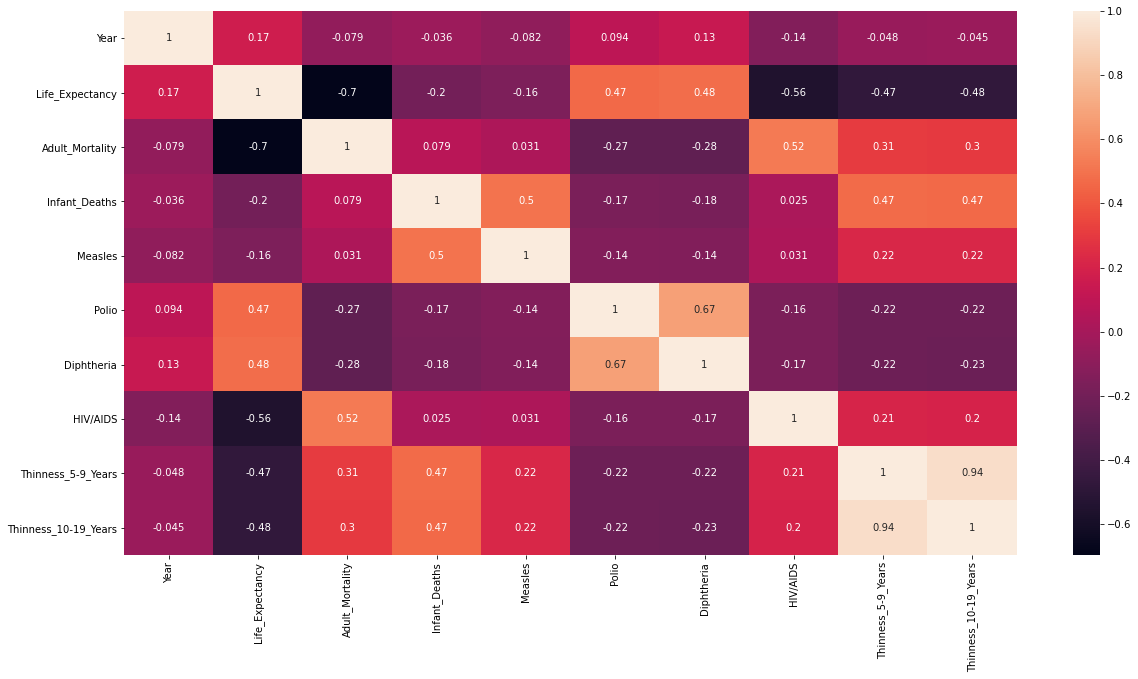

In [132]:
plt.figure(figsize=(20, 10))
print('Heatmap showing the correlation between every attribute.')
sns.heatmap(df_lifeExpectancy.corr(), annot=True)

### Visualising all the attributes of 3 different countries over the years.

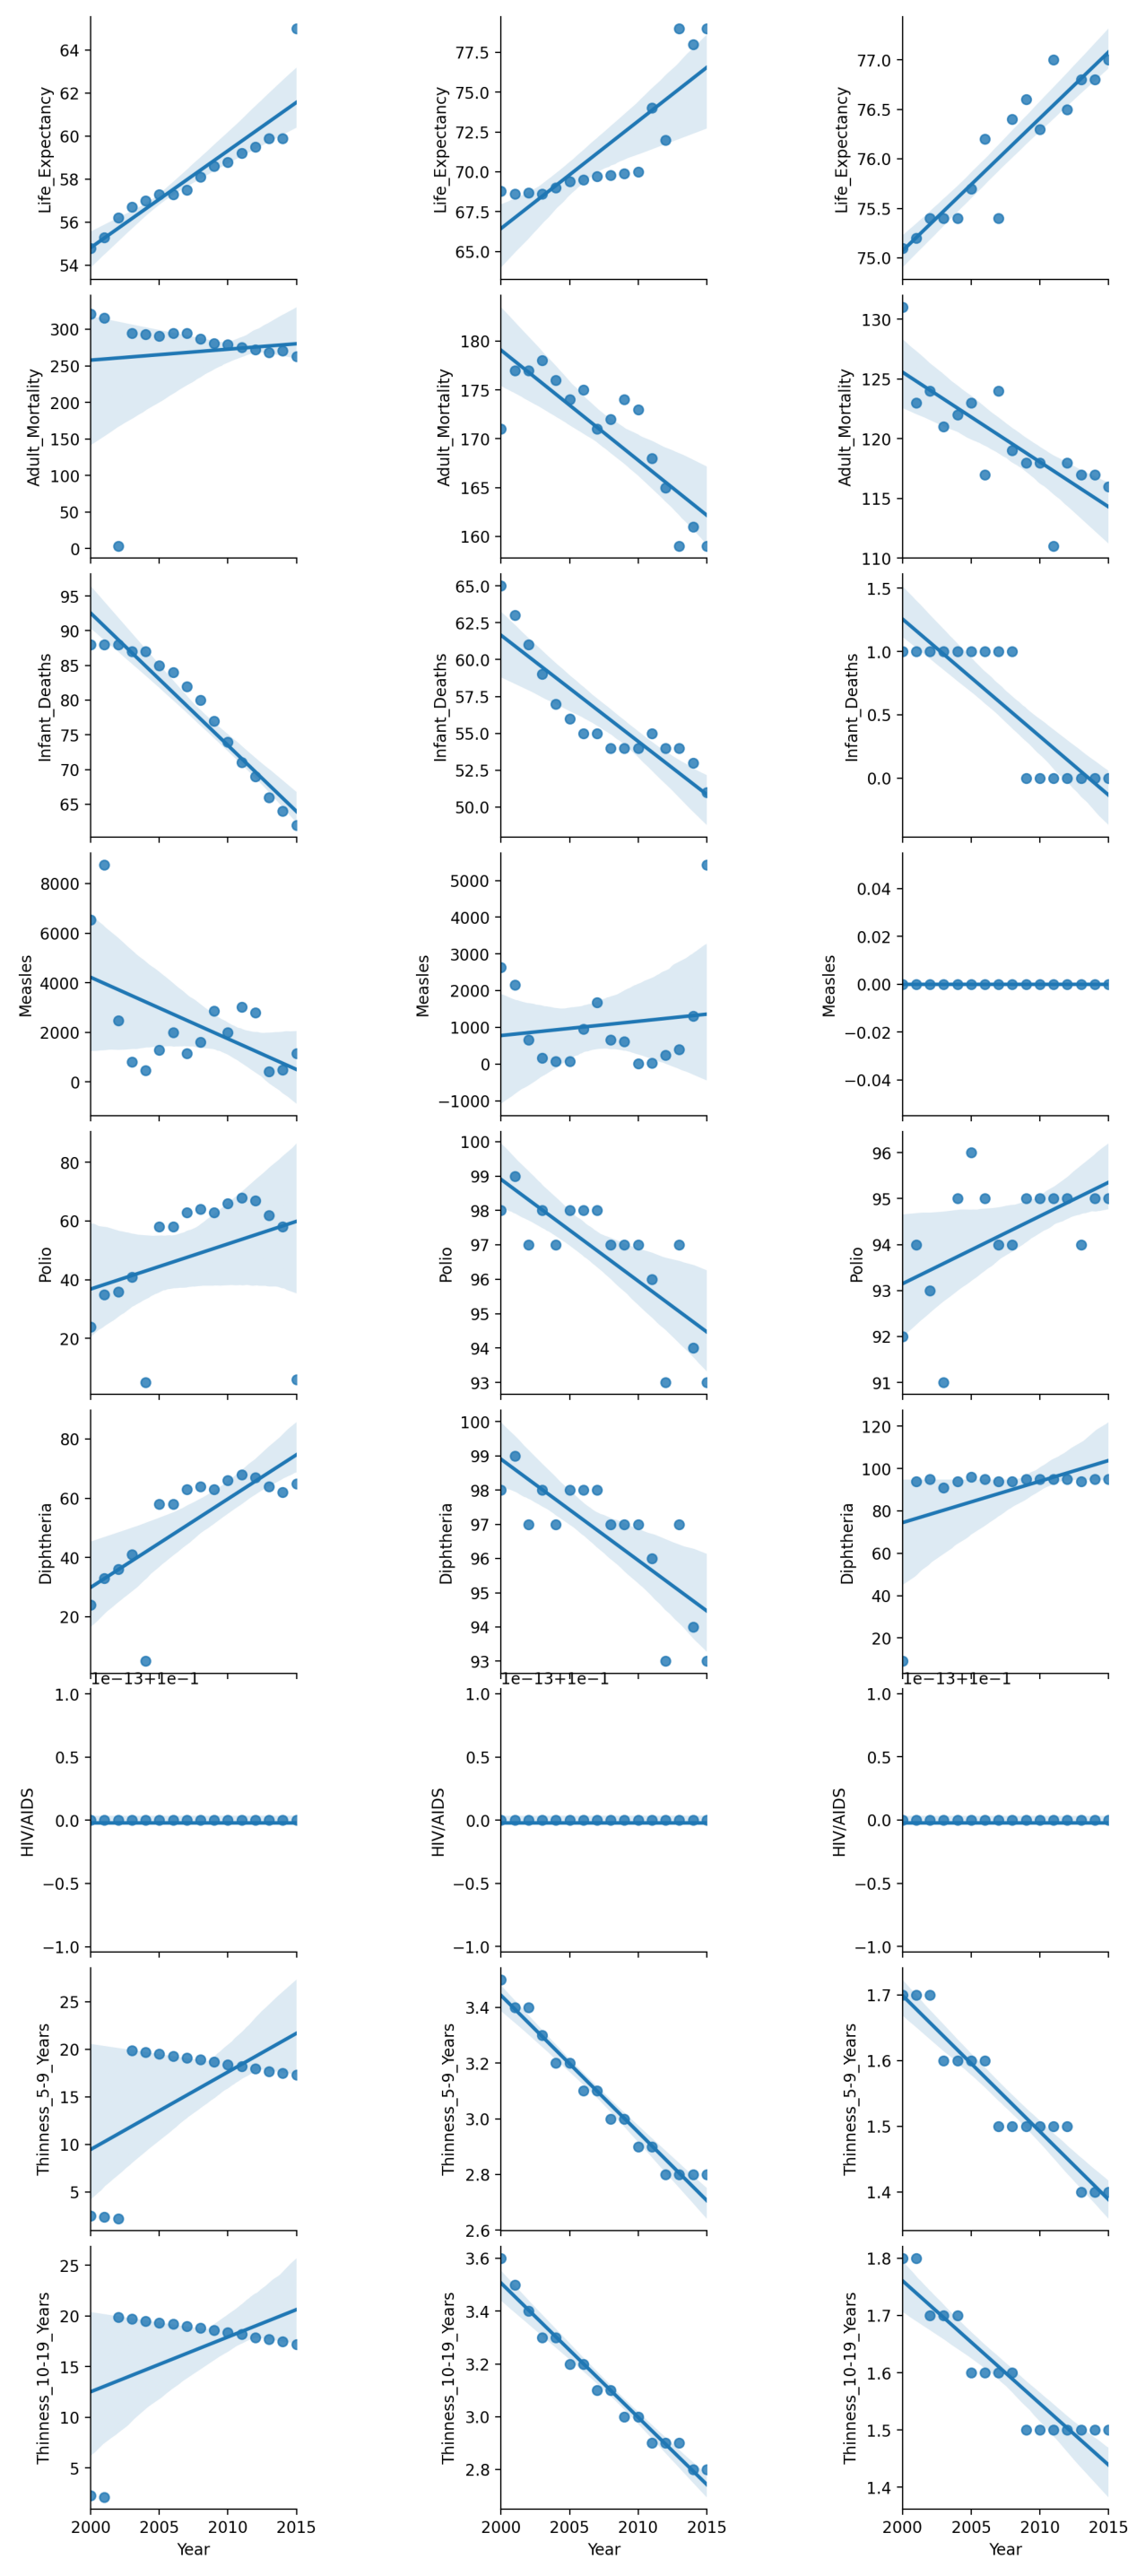

In [133]:
countryAfghanistan = df_lifeExpectancy[df_lifeExpectancy['Country'] == 'Afghanistan']
#sns.pairplot(data=countryAfghanistan, hue="Country", x_vars='Year', kind='reg', y_vars=countryAfghanistan.columns[3:])

countryEgypt = df_lifeExpectancy[df_lifeExpectancy['Country'] == 'Egypt']
#sns.pairplot(data=countryMozambique, hue="Country", x_vars='Year', kind='reg', y_vars=countryMozambique.columns[3:])

countryUruguay = df_lifeExpectancy[df_lifeExpectancy['Country'] == 'Uruguay']
#sns.pairplot(data=countryUruguay, hue="Country", x_vars='Year', kind='reg', y_vars=countryUruguay.columns[3:])

def pairplot(data, x_vars, y_vars):
    return sns.pairplot(data=data, x_vars=x_vars, y_vars=y_vars, kind='reg')

g0 = pairplot(countryAfghanistan, 'Year', countryAfghanistan.columns[3:])
g1 = pairplot(countryEgypt, 'Year', countryEgypt.columns[3:])
g2 = pairplot(countryUruguay, 'Year', countryUruguay.columns[3:])

g0.savefig('g0.png', dpi=200)
plt.close(g0.fig)

g1.savefig('g1.png', dpi=200)
plt.close(g1.fig)

g2.savefig('g2.png', dpi=200)
plt.close(g2.fig)

f, axarr = plt.subplots(nrows=1, ncols=3, figsize=(20, 40))
plt.subplots_adjust(wspace=0.05, hspace=0)
axarr[0].imshow(mpimg.imread('g0.png'))
axarr[1].imshow(mpimg.imread('g1.png'))
axarr[2].imshow(mpimg.imread('g2.png'))

[ax.set_axis_off() for ax in axarr.ravel()]
plt.tight_layout()
plt.show()

## Imputing the missing data values in the Life Expectancy dataset.

### The missing values of Polio, Diphtheria and both Thinness are less than 1%, meaning we could impute them using the mean, based on the Status of the country.

In [134]:
# Function to calculate the mean of *col* in a dataframe based on a condition passed along in the *compareCol* and *compareTo*.
def calculateMean(df, compareCol, compareTo, col):
    return df[df[compareCol] == compareTo][col].mean()
#
#  Function to replace values with *valueToReplace* in a dataframe based on a condition on the *compareCol* using a *compareTo* value in a specific *col*.
def replaceNaN(df, compareCol, compareTo, col, valueToReplace):
    df[col] = df.apply(lambda row: valueToReplace if (np.isnan(row[col]) and row[compareCol] == compareTo) else row[col], axis=1)

In [135]:
averageOfDevelopedPolio = calculateMean(df_lifeExpectancy, 'Status', 'Developed', 'Polio')
averageOfDevelopingPolio = calculateMean(df_lifeExpectancy, 'Status', 'Developing', 'Polio')

averageOfDevelopedDiph = calculateMean(df_lifeExpectancy, 'Status', 'Developed', 'Diphtheria')
averageOfDevelopingDiph = calculateMean(df_lifeExpectancy, 'Status', 'Developing', 'Diphtheria')

averageOfDevelopedThinness = calculateMean(df_lifeExpectancy, 'Status', 'Developed', 'Thinness_5-9_Years')
averageOfDevelopingThinness = calculateMean(df_lifeExpectancy, 'Status', 'Developing', 'Thinness_5-9_Years')

averageOfDevelopedThinness2 = calculateMean(df_lifeExpectancy, 'Status', 'Developed', 'Thinness_10-19_Years')
averageOfDevelopingThinness2 = calculateMean(df_lifeExpectancy, 'Status', 'Developing', 'Thinness_10-19_Years')

print('Mean polio value of developed:', averageOfDevelopedPolio)
print('Mean polio value of developing:', averageOfDevelopingPolio)

print('Mean diphtheria value of developed:', averageOfDevelopedDiph)
print('Mean diphtheria value of developing:', averageOfDevelopingDiph)

print('Mean thinness 5-9 value of developed:', averageOfDevelopedThinness)
print('Mean thinness 5-9 value of developing:', averageOfDevelopingThinness)

print('Mean thinness 10-19 value of developed:', averageOfDevelopedThinness2)
print('Mean thinness 10-19 value of developing:', averageOfDevelopingThinness2)

replaceNaN(df_lifeExpectancy, 'Status', 'Developed', 'Polio', averageOfDevelopedPolio)
replaceNaN(df_lifeExpectancy, 'Status', 'Developing', 'Polio', averageOfDevelopingPolio)

replaceNaN(df_lifeExpectancy, 'Status', 'Developed', 'Diphtheria', averageOfDevelopedDiph)
replaceNaN(df_lifeExpectancy, 'Status', 'Developing', 'Diphtheria', averageOfDevelopingDiph)

replaceNaN(df_lifeExpectancy, 'Status', 'Developed', 'Thinness_5-9_Years', averageOfDevelopedThinness)
replaceNaN(df_lifeExpectancy, 'Status', 'Developing', 'Thinness_5-9_Years', averageOfDevelopingThinness)

replaceNaN(df_lifeExpectancy, 'Status', 'Developed', 'Thinness_10-19_Years', averageOfDevelopedThinness2)
replaceNaN(df_lifeExpectancy, 'Status', 'Developing', 'Thinness_10-19_Years', averageOfDevelopingThinness2)

Mean polio value of developed: 93.736328125
Mean polio value of developing: 80.15853149770547
Mean diphtheria value of developed: 93.4765625
Mean diphtheria value of developing: 79.9386733416771
Mean thinness 5-9 value of developed: 1.296679687499998
Mean thinness 5-9 value of developing: 5.651300335570467
Mean thinness 10-19 value of developed: 1.3207031250000012
Mean thinness 10-19 value of developing: 5.608724832214765


#### Function to draw multiple box plots for given columns of a df.

In [136]:
def boxplot(df, col, ax, i):
    return sns.boxplot(x=df[col], ax=ax[i])

def drawMultipleBoxPlots(df, columns, xfigSize, yfigSize):
    f, axarr = plt.subplots(nrows=len(columns), ncols=1, figsize=(xfigSize, yfigSize))
    plt.subplots_adjust(wspace=0.1, hspace=0.5)

    i = 0
    for col in columns:
        boxplot(df, col, axarr, i)
        i += 1

    f.show()
    
def drawInterpolatedMultipleBoxPlots(df, df2, columns, xfigSize, yfigSize):
    f, axarr = plt.subplots(nrows=len(columns) * 2, ncols=1, figsize=(xfigSize, yfigSize))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    i = 0
    for col in columns:
        boxplot(df, col, axarr, i)
        i += 1
        boxplot(df2, col, axarr, i)
        i += 1

    f.show()

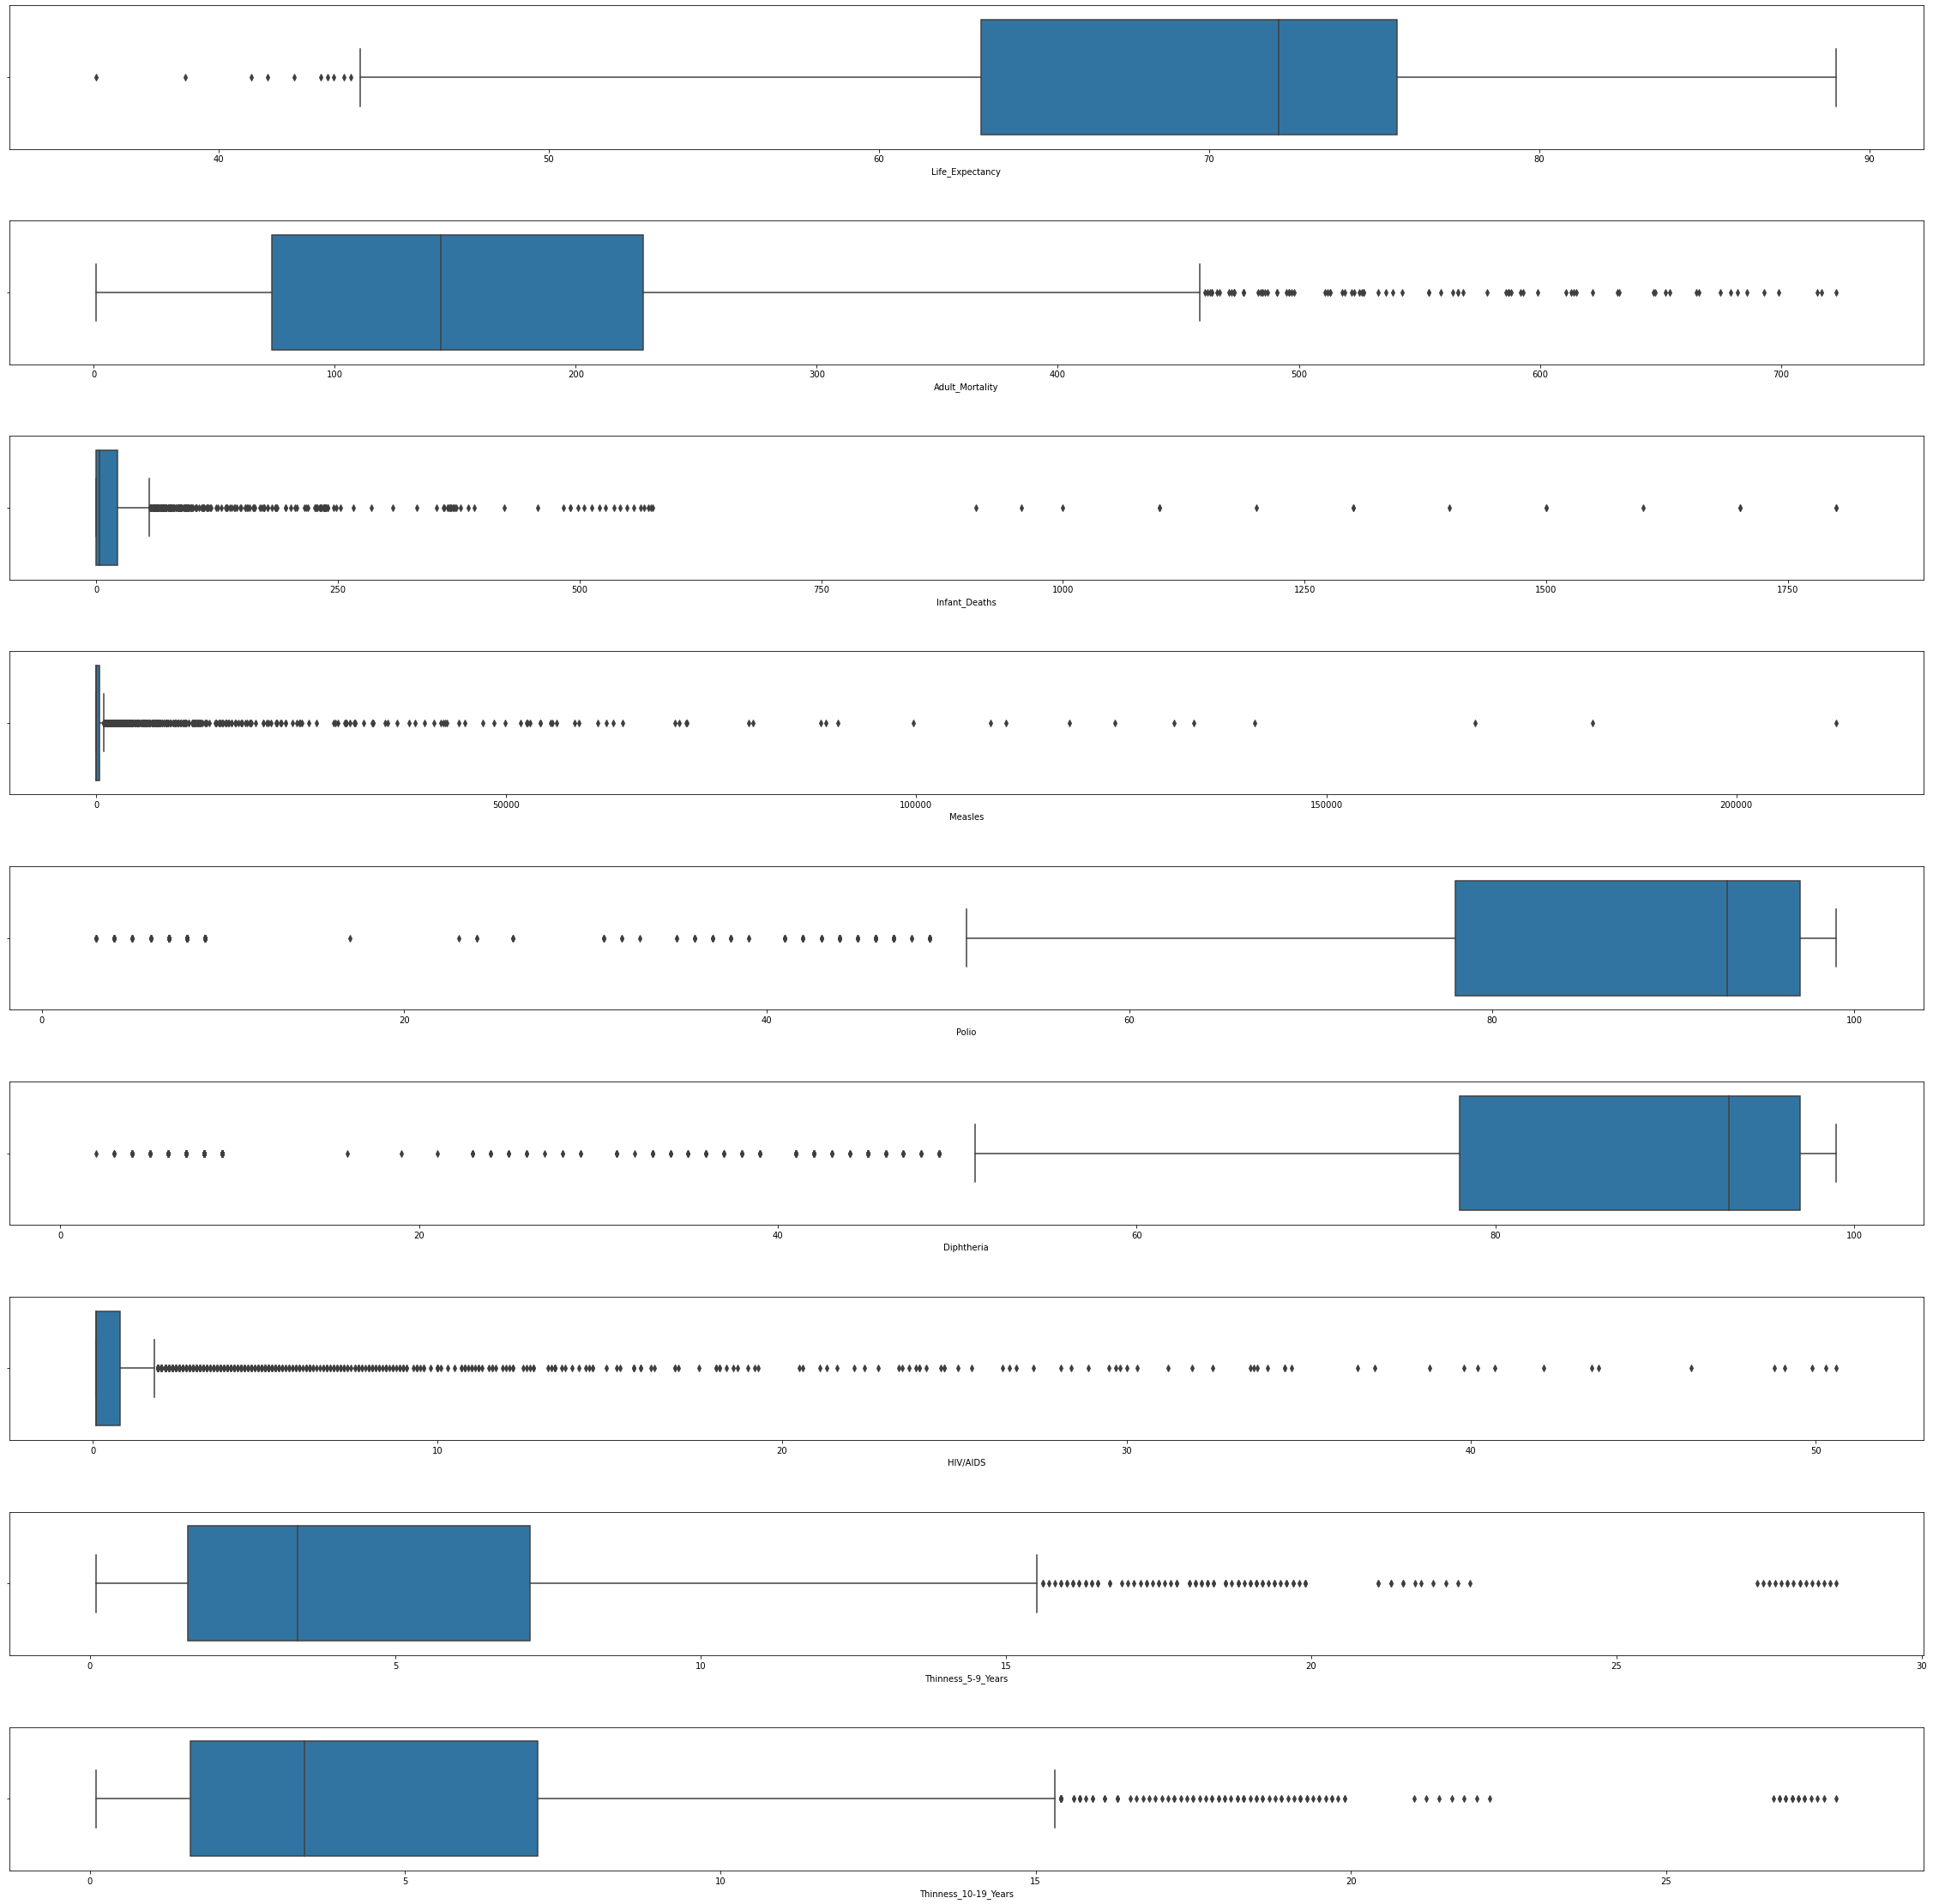

In [137]:
drawMultipleBoxPlots(df_lifeExpectancy, df_lifeExpectancy.columns[3:], 40, 40)

### Based on the above figure, we can see that there exists many values of Measles and Infant_Deaths that are more than 1000, even though the numerical values should be 1000 or below as per the column description. We will handle this by imputing any value that is higher than 1000 with the highest possible value of the box plot whisker (Q3 + IQR * 1.5).

In [138]:
Q1 = df_lifeExpectancy.quantile(0.25)
Q3 = df_lifeExpectancy.quantile(0.75)
IQR = Q3 - Q1
maxValueOfMeasles = (IQR['Measles'] * 1.5) + Q3['Measles']
maxValueOfInfantDeaths = (IQR['Infant_Deaths'] * 1.5) + Q3['Infant_Deaths']
print('The maximum value of measles cases possible per higher whisker:', maxValueOfMeasles)
print('The maximum value of infant deaths possible per higher whisker:', maxValueOfInfantDeaths)

maxValueSatisfyingConditionMeasles = df_lifeExpectancy[~(df_lifeExpectancy['Measles'] > maxValueOfMeasles)]['Measles'].max()
maxValueSatisfyingConditionInfantDeaths = df_lifeExpectancy[~(df_lifeExpectancy['Infant_Deaths'] > maxValueOfInfantDeaths)]['Infant_Deaths'].max()

print('The maximum value of measles that is less than or equal to the value of the higher whisker:', maxValueSatisfyingConditionMeasles)
print('The maximum value of infant deaths that is less than or equal to the value of the higher whisker:', maxValueSatisfyingConditionInfantDeaths)

# We will replace all values that mostly don't make sense using these conditional values.
def replace(df, col, valueToReplace):
    df[col] = df.apply(lambda row: valueToReplace if (row[col] >= valueToReplace) else row[col], axis=1)

replace(df_lifeExpectancy, 'Measles', maxValueSatisfyingConditionMeasles)
replace(df_lifeExpectancy, 'Infant_Deaths', maxValueSatisfyingConditionInfantDeaths)

The maximum value of measles cases possible per higher whisker: 905.625
The maximum value of infant deaths possible per higher whisker: 55.0
The maximum value of measles that is less than or equal to the value of the higher whisker: 899
The maximum value of infant deaths that is less than or equal to the value of the higher whisker: 55


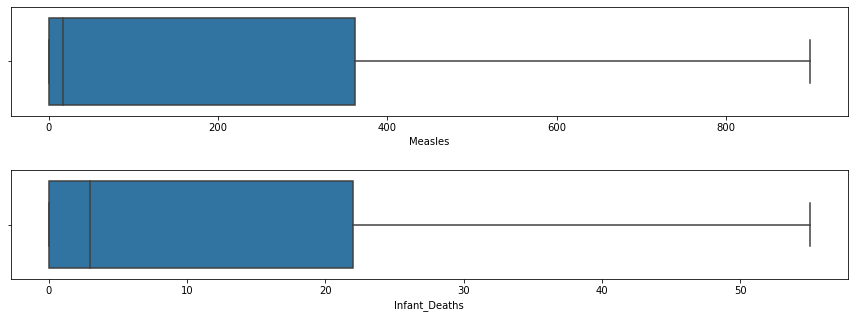

In [139]:
drawMultipleBoxPlots(df_lifeExpectancy, ['Measles', 'Infant_Deaths'], 15, 5)

In [140]:
df_lifeExpectancy.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Measles,Polio,Diphtheria,HIV/AIDS,Thinness_5-9_Years,Thinness_10-19_Years
count,2928.00000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000
mean,2007.50000,69.224932,164.796448,13.681694,234.243169,82.532791,82.305955,1.747712,4.889837,4.858907
std,4.61056,9.523867,124.292079,19.124887,353.385411,23.341337,23.630350,5.085542,4.485605,4.397304
min,2000.00000,36.300000,1.000000,0.000000,0.000000,3.000000,2.000000,0.100000,0.100000,0.100000
25%,2003.75000,63.100000,74.000000,0.000000,0.000000,78.000000,78.000000,0.100000,1.600000,1.600000
50%,2007.50000,72.100000,144.000000,3.000000,17.000000,93.000000,93.000000,0.100000,3.400000,3.400000
75%,2011.25000,75.700000,228.000000,22.000000,362.250000,97.000000,97.000000,0.800000,7.200000,7.100000
max,2015.00000,89.000000,723.000000,55.000000,899.000000,99.000000,99.000000,50.600000,28.600000,27.700000


### Removing the outliers from all columns using the mean.

In [144]:
# USING THE MEAN OF EVERY COUNTRY SEPARATELY
df_lifeExpectancy_copy = df_lifeExpectancy.copy()

# Method to replace the outliers with a value, also takes as a parameter the condition on which to replace (right outlier or left)
def replaceConditional(df, col, compareTo, valueToReplace, right):
    if right:
        df[col] = df.apply(lambda row: valueToReplace if (row[col] > compareTo) else row[col], axis=1)
    else:
        df[col] = df.apply(lambda row: valueToReplace if (row[col] < compareTo) else row[col], axis=1)

def applyCountryReplacement(df, col, country, compareTo, valueToReplace):
    df.loc[(df.Country == country) & (df[col] > compareTo), col] = valueToReplace

# Removing outliers from the left and from the right.
for country in countriesInLifeExpectancy:
    for col in df_lifeExpectancy_copy.columns[3:]:
        maxValue = (IQR[col] * 1.5) + Q3[col]
        minValue = Q1[col] - (IQR[col] * 1.5)
        mean = calculateMean(df_lifeExpectancy_copy, 'Country', country, col)
        applyCountryReplacement(df_lifeExpectancy_copy, col, country, maxValue, mean)

drawInterpolatedMultipleBoxPlots(df_lifeExpectancy, df_lifeExpectancy_copy, df_lifeExpectancy.columns[3:], 30, 70)

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Measles,Polio,Diphtheria,HIV/AIDS,Thinness_5-9_Years,Thinness_10-19_Years
0,Afghanistan,2015,Developing,65.0,263.0,55,899,6.0,65.0,0.1,17.3,17.2
1,Afghanistan,2014,Developing,59.9,271.0,55,492,58.0,62.0,0.1,17.5,17.5
2,Afghanistan,2013,Developing,59.9,268.0,55,430,62.0,64.0,0.1,17.7,17.7
3,Afghanistan,2012,Developing,59.5,272.0,55,899,67.0,67.0,0.1,18.0,17.9
4,Afghanistan,2011,Developing,59.2,275.0,55,899,68.0,68.0,0.1,18.2,18.2
5,Afghanistan,2010,Developing,58.8,279.0,55,899,66.0,66.0,0.1,18.4,18.4
6,Afghanistan,2009,Developing,58.6,281.0,55,899,63.0,63.0,0.1,18.7,18.6
7,Afghanistan,2008,Developing,58.1,287.0,55,899,64.0,64.0,0.1,18.9,18.8
8,Afghanistan,2007,Developing,57.5,295.0,55,899,63.0,63.0,0.1,19.1,19.0
9,Afghanistan,2006,Developing,57.3,295.0,55,899,58.0,58.0,0.1,19.3,19.2


,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Measles,Polio,Diphtheria,HIV/AIDS,Thinness_5-9_Years,Thinness_10-19_Years
count,2928.00000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000
mean,2007.50000,69.318664,153.848125,13.681694,234.243169,88.403391,88.538492,0.518770,4.381023,4.365734
std,4.61056,9.386330,104.343963,19.124887,353.385411,10.912632,10.464381,0.658522,3.418678,3.387851
min,2000.00000,44.300000,1.000000,0.000000,0.000000,51.000000,51.000000,0.100000,0.100000,0.100000
25%,2003.75000,63.300000,74.000000,0.000000,0.000000,82.532791,82.305955,0.100000,1.600000,1.600000
50%,2007.50000,72.100000,144.000000,3.000000,17.000000,93.000000,93.000000,0.100000,3.400000,3.400000
75%,2011.25000,75.700000,218.000000,22.000000,362.250000,97.000000,97.000000,0.800000,6.700000,6.625000
max,2015.00000,89.000000,459.000000,55.000000,899.000000,99.000000,99.000000,1.800000,15.500000,15.300000


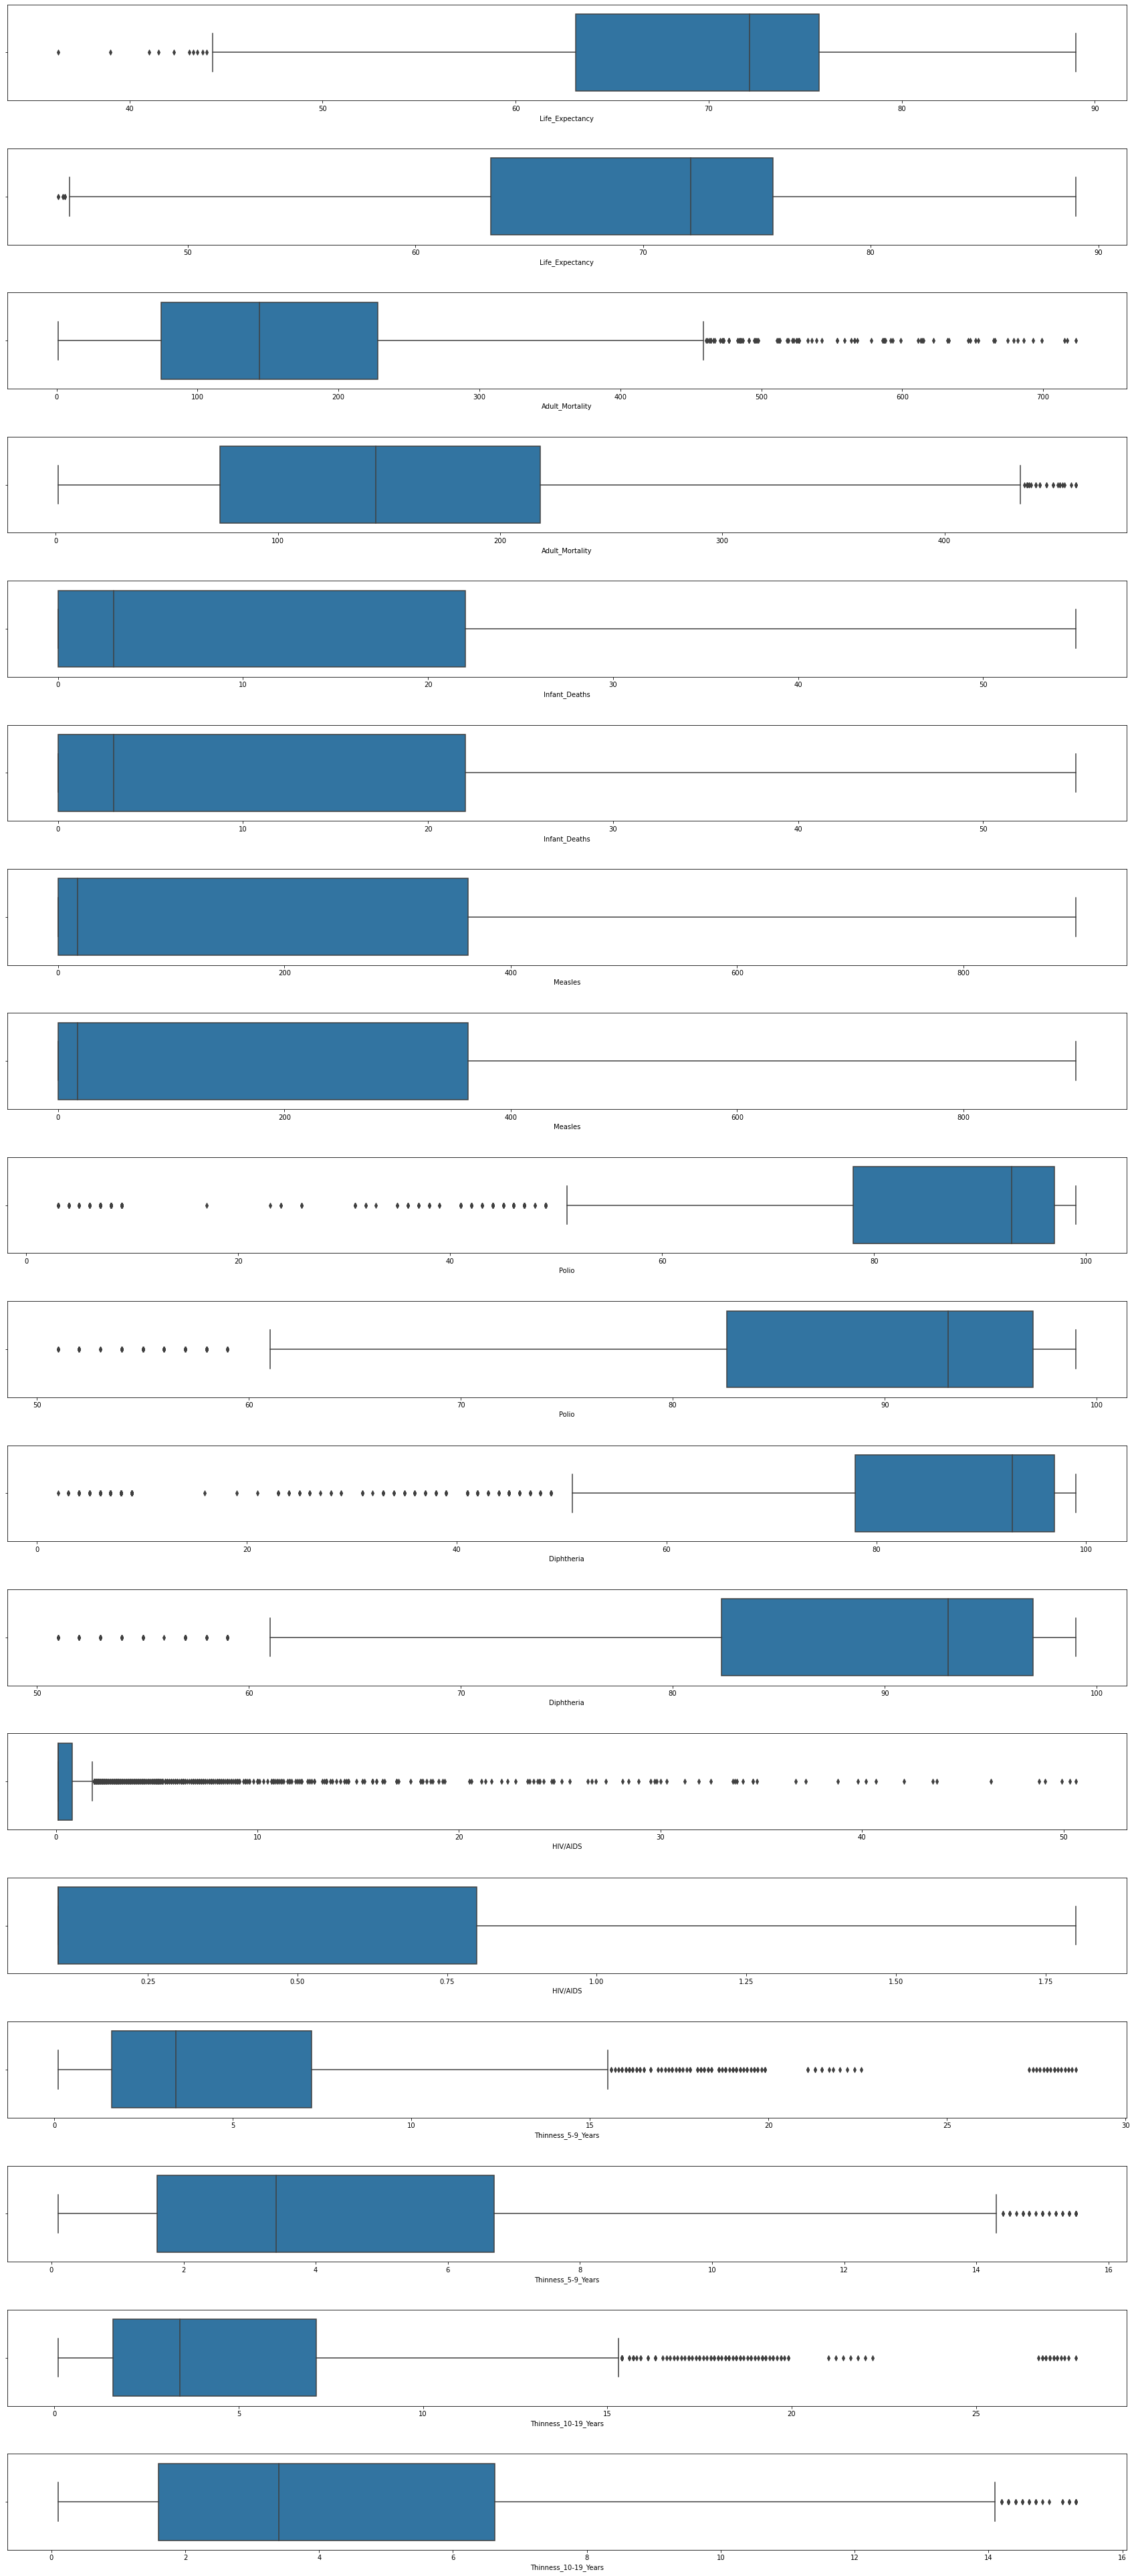

In [142]:
# USING THE MEAN OF EVERY COLUMN COLLECTIVELY
df_lifeExpectancy_copy = df_lifeExpectancy.copy()

# Method to replace the outliers with a value, also takes as a parameter the condition on which to replace (right outlier or left)
def replaceConditional(df, col, compareTo, valueToReplace, right):
    if right:
        df[col] = df.apply(lambda row: valueToReplace if (row[col] > compareTo) else row[col], axis=1)
    else:
        df[col] = df.apply(lambda row: valueToReplace if (row[col] < compareTo) else row[col], axis=1)

# Removing outliers from the left and from the right.
for col in df_lifeExpectancy_copy.columns[3:]:
    maxValue = (IQR[col] * 1.5) + Q3[col]
    minValue = Q1[col] - (IQR[col] * 1.5)
    mean = df_lifeExpectancy_copy[col].mean()
    replaceConditional(df_lifeExpectancy_copy, col, maxValue, mean, True)
    replaceConditional(df_lifeExpectancy_copy, col, minValue, mean, False)
drawInterpolatedMultipleBoxPlots(df_lifeExpectancy, df_lifeExpectancy_copy, df_lifeExpectancy.columns[3:], 30, 70)
df_lifeExpectancy_copy.describe()

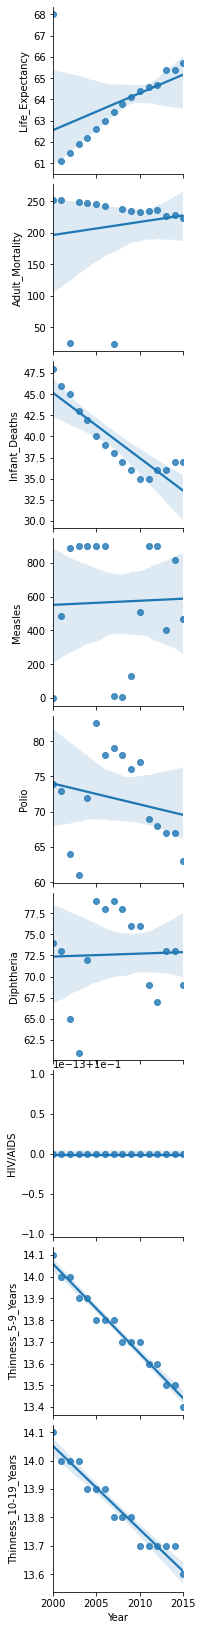

In [64]:
pairplot(df_lifeExpectancy_copy[df_lifeExpectancy_copy['Country'] == 'Yemen'], 'Year', df_lifeExpectancy_copy.columns[3:])

In [59]:
# model = LinearRegression()
# years = np.flip(np.array([*df_lifeExpectancy.groupby(['Year']).groups.keys()]).reshape(-1, 1))
# allCountries = [*df_lifeExpectancy.groupby(['Country']).groups.keys()]
# years_predict = np.array([2016, 2017, 2018, 2019]).reshape(-1, 1)
# dicData = {}
# for country in allCountries:
#     dicCountry = {}
#     for columnName, columnData in df_lifeExpectancy.iteritems():
#         if(columnName == 'Country' or columnName == 'Year' or columnName == 'Status'):
#             continue
#         x_train = np.array(df_lifeExpectancy[df_lifeExpectancy['Country'] == country][columnName]).reshape(-1, 1)
#         model.fit(years, x_train)
#         x_predict = model.predict(years_predict)
#         dicCountry[columnName] = x_predict
#         # print(x_predict)
#     dicData[country] = dicCountry
print(df_lifeExpectancy[df_lifeExpectancy['Country'] == 'Yemen']['Thinness_10-19_Years'])
dicData['Yemen']['Thinness_10-19_Years']

2890    13.6
2891    13.7
2892    13.7
2893    13.7
2894    13.7
2895    13.7
2896    13.8
2897    13.8
2898    13.8
2899    13.9
2900    13.9
2901    13.9
2902    14.0
2903    14.0
2904    14.0
2905    14.1
Name: Thinness_10-19_Years, dtype: float64


array([[13.58      ],
       [13.55044118],
       [13.52088235],
       [13.49132353]])

# ---------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------

## Attempting to join the 3 datasets together.

### Query tool to get the list of countries, from a dataframe.

In [25]:
def getCountriesList(df):
    return [*df.groupby(['Country']).groups.keys()]

In [26]:
print('Number of countries in life expectancy dataset:', len(getCountriesList(df_lifeExpectancy)))
print('Number of countries in happiness dataset:', len(getCountriesList(df_happiness)))
print('Number of countries in 250 Countries dataset:', len(getCountriesList(df_countryData)))

Number of countries in life expectancy dataset: 193
Number of countries in happiness dataset: 148
Number of countries in 250 Countries dataset: 250


In [27]:
list = set(getCountriesList(df_happiness)).difference(getCountriesList(df_lifeExpectancy))
print('Countries in happiness dataset but not in the life expectancy dataset:', '(', len(list), ')')
print(*list, sep='\n')
print()
list2 = set(getCountriesList(df_lifeExpectancy)).difference(getCountriesList(df_happiness))
print('Countries in life expectancy dataset but not in the happiness dataset:', '(', len(list2), ')')
print(*list2, sep='\n')

Countries in happiness dataset but not in the life expectancy dataset: ( 21 )
Macedonia
Syria
Bolivia
South Korea
Congo (Kinshasa)
United Kingdom
Congo (Brazzaville)
Vietnam
Hong Kong
Russia
Venezuela
Taiwan
Palestinian Territories
Iran
Czech Republic
Ivory Coast
North Cyprus
Kosovo
Moldova
Tanzania
United States

Countries in life expectancy dataset but not in the happiness dataset: ( 66 )
Iran (Islamic Republic of)
Oman
Brunei Darussalam
Palau
Kiribati
Republic of Korea
Belize
Tuvalu
Saint Kitts and Nevis
Papua New Guinea
Equatorial Guinea
The former Yugoslav republic of Macedonia
Democratic Republic of the Congo
Solomon Islands
United Republic of Tanzania
Cabo Verde
Samoa
Congo
Gambia
Guinea-Bissau
Namibia
Niue
Comoros
Dominica
Cook Islands
Saint Lucia
Bolivia (Plurinational State of)
Venezuela (Bolivarian Republic of)
Syrian Arab Republic
Grenada
Central African Republic
Guyana
Mozambique
Antigua and Barbuda
Seychelles
Timor-Leste
Vanuatu
Somalia
Nauru
United Kingdom of Great Brita

### Using the countries difference found above, we renamed the counrtries in the life expectancy dataset to have a consistent naming schema.

In [28]:
df_lifeExpectancy['Country'] = df_lifeExpectancy['Country'].replace({
    'Iran (Islamic Republic of)':'Iran', 
    'Czechia':'Czech Republic',
    'Democratic Republic of the Congo':'Congo (Kinshasa)',
    'Congo':'Congo (Brazzaville)',
    'United Republic of Tanzania':'Tanzania',
    'Russian Federation':'Russia',
    'United States of America':'United States',
    'Venezuela (Bolivarian Republic of)':'Venezuela',
    "Côte d'Ivoire":'Ivory Coast',
    'Viet Nam':'Vietnam',
    'Republic of Korea':'South Korea',
    'Syrian Arab Republic':'Syria',
    "Lao People's Democratic Republic":'Laos',
    'Republic of Moldova':'Moldova',
    'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
    'Bolivia (Plurinational State of)':'Bolivia',
    'The former Yugoslav republic of Macedonia':'Macedonia',
    'Czechia':'Czech Republic'
    })

### Rechecking for differences: we find now that there is an improvement.

In [29]:
list = set(getCountriesList(df_happiness)).difference(getCountriesList(df_lifeExpectancy))
print('Countries in happiness dataset but not in the life expectancy dataset:', '(', len(list), ')')
print(*list, sep='\n')
print()
list2 = set(getCountriesList(df_lifeExpectancy)).difference(getCountriesList(df_happiness))
print('Countries in life expectancy dataset but not in the happiness dataset:', '(', len(list2), ')')
print(*list2, sep='\n')

Countries in happiness dataset but not in the life expectancy dataset: ( 5 )
Hong Kong
Taiwan
Palestinian Territories
North Cyprus
Kosovo

Countries in life expectancy dataset but not in the happiness dataset: ( 50 )
Oman
Brunei Darussalam
Monaco
South Sudan
Palau
Micronesia (Federated States of)
Saint Vincent and the Grenadines
San Marino
Kiribati
Belize
Tuvalu
Sao Tome and Principe
Eritrea
Marshall Islands
Saint Kitts and Nevis
Maldives
Laos
Fiji
Papua New Guinea
Equatorial Guinea
Solomon Islands
Suriname
Cabo Verde
Djibouti
Samoa
Gambia
Namibia
Guinea-Bissau
Niue
Comoros
Dominica
Democratic People's Republic of Korea
Cook Islands
Saint Lucia
Barbados
Grenada
Lesotho
Central African Republic
Guyana
Mozambique
Antigua and Barbuda
Seychelles
Timor-Leste
Vanuatu
Tonga
Somalia
Swaziland
Nauru
Bahamas
Cuba


In [30]:
countriesListJoined_lifeExpectancy_happiness = set(getCountriesList(df_lifeExpectancy)) & set(getCountriesList(df_happiness))
print('Number of countries after joining happiness dataset with life expectancy dataset:', len(countriesListJoined_lifeExpectancy_happiness))
print('Country list after joining:', *countriesListJoined_lifeExpectancy_happiness, sep='\n')

Number of countries after joining happiness dataset with life expectancy dataset: 143
Country list after joining:
India
Indonesia
Italy
Macedonia
Morocco
Syria
Bolivia
Sweden
Nigeria
Slovakia
Jordan
South Korea
Peru
Belgium
New Zealand
Philippines
Armenia
Japan
Congo (Kinshasa)
Saudi Arabia
United Kingdom
Nicaragua
Congo (Brazzaville)
Bangladesh
Guatemala
Kyrgyzstan
Gabon
Trinidad and Tobago
Ghana
Lithuania
Egypt
Malaysia
Togo
Vietnam
Yemen
Montenegro
Cambodia
Mauritius
Guinea
Pakistan
Iceland
Ecuador
Dominican Republic
Singapore
Zimbabwe
Chad
Ethiopia
Nepal
Serbia
Afghanistan
France
Lebanon
Austria
South Africa
Bulgaria
Mali
Turkey
Greece
Croatia
Malawi
Benin
Burundi
Iraq
Poland
Sri Lanka
Latvia
Bahrain
Slovenia
Netherlands
Russia
Argentina
Canada
Tajikistan
Kazakhstan
Paraguay
Algeria
Cyprus
United Arab Emirates
Brazil
Panama
Honduras
Switzerland
Bhutan
Kenya
Venezuela
Rwanda
Hungary
Colombia
Libya
Estonia
Jamaica
Israel
China
Costa Rica
Sudan
Iran
Romania
Czech Republic
Uganda
Spain

In [31]:
print('Countries to be dropped from the happiness dataset:', set(getCountriesList(df_happiness)).difference(getCountriesList(df_lifeExpectancy)))

Countries to be dropped from the happiness dataset: {'Hong Kong', 'Taiwan', 'Palestinian Territories', 'North Cyprus', 'Kosovo'}


### Now to join the 250 country data set with the filtered country list after joining life expectancy countries with happiness.

In [32]:
list = set(countriesListJoined_lifeExpectancy_happiness).difference(getCountriesList(df_countryData))
print('In the cleaned list of countries and not in the 250 countries dataset:', '(', len(list), ')')
print(*list, sep='\n')
print()
list2 = set(getCountriesList(df_countryData)).difference(countriesListJoined_lifeExpectancy_happiness)
print('In the 250 countries dataset and not in the cleaned list of countries:', '(', len(list2), ')')
print(*list2, sep='\n')

In the cleaned list of countries and not in the 250 countries dataset: ( 15 )
Congo (Kinshasa)
United Kingdom
Macedonia
Syria
Congo (Brazzaville)
Ivory Coast
Bolivia
Iran
South Korea
Tanzania
United States
Russia
Vietnam
Venezuela
Moldova

In the 250 countries dataset and not in the cleaned list of countries: ( 122 )
Oman
Iran (Islamic Republic of)
Brunei Darussalam
Falkland Islands (Malvinas)
South Georgia and the South Sandwich Islands
Greenland
Saint Pierre and Miquelon
Åland Islands
Palau
French Polynesia
Kiribati
Saint Barthélemy
Liechtenstein
Réunion
Belize
Tuvalu
Montserrat
Mayotte
Korea (Republic of)
Saint Kitts and Nevis
Andorra
Guam
Papua New Guinea
Equatorial Guinea
Solomon Islands
Sint Maarten (Dutch part)
Tokelau
Cabo Verde
Heard Island and McDonald Islands
Samoa
Congo
Gambia
Wallis and Futuna
Namibia
Guinea-Bissau
Bonaire, Sint Eustatius and Saba
Niue
Comoros
Dominica
Cook Islands
Saint Lucia
Bolivia (Plurinational State of)
Venezuela (Bolivarian Republic of)
Syrian Arab 

In [33]:
df_countryData['Country'] = df_countryData['Country'].replace({
    'Iran (Islamic Republic of)':'Iran',
    'Tanzania, United Republic of':'Tanzania',
    'Congo':'Congo (Brazzaville)',
    'Congo (Democratic Republic of the)':'Congo (Kinshasa)',
    'Russian Federation':'Russia',
    'United States of America':'United States',
    'Venezuela (Bolivarian Republic of)':'Venezuela',
    "Côte d'Ivoire":'Ivory Coast',
    'Viet Nam':'Vietnam',
    'Korea (Republic of)':'South Korea',
    'Syrian Arab Republic':'Syria',
    "Lao People's Democratic Republic":'Laos', 
    'Moldova (Republic of)':'Moldova',
    'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
    'Bolivia (Plurinational State of)':'Bolivia',
    'Macedonia (the former Yugoslav Republic of)':'Macedonia'
    })

In [34]:
list = set(countriesListJoined_lifeExpectancy_happiness).difference(getCountriesList(df_countryData))
print('In the cleaned list of countries and not in the 250 countries dataset:', '(', len(list), ')')
print(*list, sep='\n')
print()
list2 = set(getCountriesList(df_countryData)).difference(countriesListJoined_lifeExpectancy_happiness)
print('In the 250 countries dataset and not in the cleaned list of countries:', '(', len(list2), ')')
print(*list2, sep='\n')

In the cleaned list of countries and not in the 250 countries dataset: ( 0 )


In the 250 countries dataset and not in the cleaned list of countries: ( 107 )
Oman
Brunei Darussalam
Falkland Islands (Malvinas)
South Georgia and the South Sandwich Islands
Greenland
Saint Pierre and Miquelon
Åland Islands
Palau
French Polynesia
Kiribati
Saint Barthélemy
Liechtenstein
Réunion
Belize
Tuvalu
Montserrat
Mayotte
Saint Kitts and Nevis
Andorra
Laos
Guam
Papua New Guinea
Equatorial Guinea
Solomon Islands
Sint Maarten (Dutch part)
Tokelau
Cabo Verde
Heard Island and McDonald Islands
Samoa
Wallis and Futuna
Gambia
Namibia
Guinea-Bissau
Bonaire, Sint Eustatius and Saba
Niue
Comoros
Dominica
Cook Islands
Saint Lucia
Northern Mariana Islands
Cocos (Keeling) Islands
Grenada
Guernsey
Central African Republic
Bermuda
Korea (Democratic People's Republic of)
Guyana
Hong Kong
Antigua and Barbuda
Mozambique
Seychelles
Timor-Leste
Western Sahara
Vanuatu
Saint Helena, Ascension and Tristan da Cunha
Somalia
Nau

In [35]:
countriesList_joinedThree = set(getCountriesList(df_countryData)) & set(countriesListJoined_lifeExpectancy_happiness)
print('Count of countries after joining all three datasets:', len(countriesList_joinedThree), *sorted(countriesList_joinedThree), sep='\n')

Count of countries after joining all three datasets:
143
Afghanistan
Albania
Algeria
Angola
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahrain
Bangladesh
Belarus
Belgium
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Chad
Chile
China
Colombia
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Croatia
Cyprus
Czech Republic
Denmark
Dominican Republic
Ecuador
Egypt
El Salvador
Estonia
Ethiopia
Finland
France
Gabon
Georgia
Germany
Ghana
Greece
Guatemala
Guinea
Haiti
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Ivory Coast
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kuwait
Kyrgyzstan
Latvia
Lebanon
Liberia
Libya
Lithuania
Luxembourg
Macedonia
Madagascar
Malawi
Malaysia
Mali
Malta
Mauritania
Mauritius
Mexico
Moldova
Mongolia
Montenegro
Morocco
Myanmar
Nepal
Netherlands
New Zealand
Nicaragua
Niger
Nigeria
Norway
Pakistan
Panama
Paraguay
Peru
Philippines
Poland
Portugal
Qatar
Romania
Russia
Rwanda
Saudi A

### Dropping the countries that are not in the joined list of countries from all data frames.

In [ ]:
df_countryData = df_countryData.loc[(df_countryData['Country'].isin(countriesList_joinedThree)), :]
df_happiness = df_happiness.loc[(df_happiness['Country'].isin(countriesList_joinedThree)), :]
df_lifeExpectancy = df_lifeExpectancy.loc[(df_lifeExpectancy['Country'].isin(countriesList_joinedThree)), :]

In [ ]:
print('Countries in country data:', len(getCountriesList(df_countryData)))
print('Countries in happiness:', len(getCountriesList(df_happiness)))
print('Coutnries in life expectancy:', len(getCountriesList(df_lifeExpectancy)))

## Merging Country Data dataset with the Happiness Dataset.

In [ ]:
df_country_happiness = pd.merge(df_countryData, df_happiness, on='Country', how='inner')
df_country_happiness.head(10)

# ---------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------

In [42]:
model = LinearRegression()
years = np.flip(np.array([*df_lifeExpectancy.groupby(['Year']).groups.keys()]).reshape(-1, 1))
allCountries = [*df_lifeExpectancy.groupby(['Country']).groups.keys()]
years_predict = np.array([2016, 2017, 2018, 2019]).reshape(-1, 1)
for country in allCountries:
    for columnName, columnData in df_lifeExpectancy.iteritems():
        if(columnName == 'Country' or columnName == 'Year' or columnName == 'Status'):
            continue
        x_train = np.array(df_lifeExpectancy[df_lifeExpectancy['Country'] == country][columnName]).reshape(-1, 1)
        model.fit(years, x_train)
        x_predict = model.predict(years_predict)
        print(x_predict)

[[62.02      ]
 [62.47014706]
 [62.92029412]
 [63.37044118]]
[[281.775     ]
 [283.27058824]
 [284.76617647]
 [286.26176471]]
[[55.]
 [55.]
 [55.]
 [55.]]
[[794.5 ]
 [783.75]
 [773.  ]
 [762.25]]
[[61.45      ]
 [62.98823529]
 [64.52647059]
 [66.06470588]]
[[77.7       ]
 [80.68676471]
 [83.67352941]
 [86.66029412]]
[[0.1]
 [0.1]
 [0.1]
 [0.1]]
[[22.5025    ]
 [23.31676471]
 [24.13102941]
 [24.94529412]]
[[21.1775    ]
 [21.71823529]
 [22.25897059]
 [22.79970588]]
[[78.31      ]
 [78.68102941]
 [79.05205882]
 [79.42308824]]
[[83.6       ]
 [88.13382353]
 [92.66764706]
 [97.20147059]]
[[ 0.        ]
 [-0.08088235]
 [-0.16176471]
 [-0.24264706]]
[[ -76.5       ]
 [ -91.77941176]
 [-107.05882353]
 [-122.33823529]]
[[99.275     ]
 [99.41029412]
 [99.54558824]
 [99.68088235]]
[[99.25      ]
 [99.38970588]
 [99.52941176]
 [99.66911765]]
[[0.1]
 [0.1]
 [0.1]
 [0.1]]
[[1.175     ]
 [1.11323529]
 [1.05147059]
 [0.98970588]]
[[1.0725    ]
 [1.00823529]
 [0.94397059]
 [0.87970588]]
[[76.3475    ]

 [100.00882353]]
[[0.1]
 [0.1]
 [0.1]
 [0.1]]
[[4.9775    ]
 [4.89544118]
 [4.81338235]
 [4.73132353]]
[[5.505     ]
 [5.42323529]
 [5.34147059]
 [5.25970588]]
[[74.71      ]
 [74.92882353]
 [75.14764706]
 [75.36647059]]
[[125.675     ]
 [125.69558824]
 [125.71617647]
 [125.73676471]]
[[0.75      ]
 [0.72794118]
 [0.70588235]
 [0.68382353]]
[[244.9       ]
 [257.31470588]
 [269.72941176]
 [282.14411765]]
[[92.575     ]
 [92.37794118]
 [92.18088235]
 [91.98382353]]
[[92.65      ]
 [92.49117647]
 [92.33235294]
 [92.17352941]]
[[0.1]
 [0.1]
 [0.1]
 [0.1]]
[[1.7525]
 [1.705 ]
 [1.6575]
 [1.61  ]]
[[1.7775    ]
 [1.73588235]
 [1.69426471]
 [1.65264706]]
[[60.605     ]
 [61.18867647]
 [61.77235294]
 [62.35602941]]
[[133.175     ]
 [119.13676471]
 [105.09852941]
 [ 91.06029412]]
[[38.225     ]
 [37.45735294]
 [36.68970588]
 [35.92205882]]
[[387.3       ]
 [362.77647059]
 [338.25294118]
 [313.72941176]]
[[64.85      ]
 [64.36176471]
 [63.87352941]
 [63.38529412]]
[[87.275     ]
 [88.44705882]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### Code to impute the values of alcohol using the mean value of alcohol consumption per developing/developed.

In [ ]:
df_intermediate = df_lifeExpectancy.copy()
averageOfDeveloping = df_intermediate[df_intermediate['Status'] == 'Developing']['Alcohol'].mean()
averageOfDeveloped = df_intermediate[df_intermediate['Status'] == 'Developed']['Alcohol'].mean()
print('Mean alcohol consumption of developing:', averageOfDeveloping)
print('Mean alcohol consumption of developed:', averageOfDeveloped)

df_intermediate['Alcohol'] = df_intermediate.apply(
    lambda row: averageOfDeveloping if (np.isnan(row['Alcohol']) and row['Status'] == 'Developing') else row['Alcohol'], axis=1
)
df_intermediate['Alcohol'] = df_intermediate.apply(
    lambda row: averageOfDeveloped if (np.isnan(row['Alcohol']) and row['Status'] == 'Developed') else row['Alcohol'], axis=1
)
df_intermediate.isna().sum()

In [225]:
pd.merge(df_countryData, df_happiness, on='Country', how='inner')

,Country,Region,Subregion,Population,Area,Gini,Real Growth Rating,Literacy Rate,Inflation,Unemployment,Economy_GDP_per_Capita,Family,Freedom,Generosity,Happiness_Rank,Happiness_Score,Health_Life_Expectancy,Trust_Government_Corruption,Year
0,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.8,3.1% (2013 est.).,28.1% (2000 est.),6.8% (2013 est.).,35% (2008 est.).,0.319820,0.302850,0.234140,0.365100,153,3.575,0.303350,0.097190,2015
1,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.8,3.1% (2013 est.).,28.1% (2000 est.),6.8% (2013 est.).,35% (2008 est.).,0.382270,0.110370,0.164300,0.312680,154,3.360,0.173440,0.071120,2016
2,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.8,3.1% (2013 est.).,28.1% (2000 est.),6.8% (2013 est.).,35% (2008 est.).,0.401477,0.581543,0.106180,0.311871,141,3.794,0.180747,0.061158,2017
3,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.8,3.1% (2013 est.).,28.1% (2000 est.),6.8% (2013 est.).,35% (2008 est.).,0.332000,0.537000,0.085000,0.191000,145,3.632,0.255000,0.036000,2018
4,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.8,3.1% (2013 est.).,28.1% (2000 est.),6.8% (2013 est.).,35% (2008 est.).,0.319820,0.302850,0.234140,0.365100,153,3.575,0.303350,0.097190,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,Zimbabwe,Africa,Eastern Africa,14240168,390757.0,NaN,NaN,NaN,NaN,NaN,0.271000,1.032760,0.258610,0.189870,115,4.610,0.334750,0.080790,2015
721,Zimbabwe,Africa,Eastern Africa,14240168,390757.0,NaN,NaN,NaN,NaN,NaN,0.350410,0.714780,0.254290,0.185030,131,4.193,0.159500,0.085820,2016
722,Zimbabwe,Africa,Eastern Africa,14240168,390757.0,NaN,NaN,NaN,NaN,NaN,0.375847,1.083096,0.336384,0.189143,138,3.875,0.196764,0.095375,2017
723,Zimbabwe,Africa,Eastern Africa,14240168,390757.0,NaN,NaN,NaN,NaN,NaN,0.357000,1.094000,0.406000,0.132000,144,3.692,0.248000,0.099000,2018


In [29]:
df_integrated = pd.merge(
    pd.merge(df_countryData, df_happiness, on='Country', how='inner'), 
        df_lifeExpectancy, on='Country', how='inner')

In [30]:
list = []
x = [*df_lifeExpectancy.groupby(['Year']).groups.keys()]
x

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

In [106]:
model = LinearRegression()
years = np.flip(np.array([*df_lifeExpectancy.groupby(['Year']).groups.keys()]).reshape(-1, 1))
allCountries = [*df_integrated.groupby(['Country']).groups.keys()]
years_predict = np.array([2016, 2017, 2018, 2019]).reshape(-1, 1)
for country in allCountries:
    for columnName, columnData in df_lifeExpectancy.iteritems():
        if(columnName == 'Country' or columnName == 'Year' or columnName == 'Status'):
            continue
        x_train = np.array(df_lifeExpectancy[df_lifeExpectancy['Country'] == country][columnName]).reshape(-1, 1)
        model.fit(years, x_train)
        x_predict = model.predict(years_predict)
        print(x_predict)

[[62.02      ]
 [62.47014706]
 [62.92029412]
 [63.37044118]]
[[281.775     ]
 [283.27058824]
 [284.76617647]
 [286.26176471]]
[[62.05      ]
 [60.14411765]
 [58.23823529]
 [56.33235294]]
[[0.01225]
 [0.012  ]
 [0.01175]
 [0.0115 ]]
[[77.74084862]
 [82.77387668]
 [87.80690474]
 [92.83993281]]
[[65.25      ]
 [65.33088235]
 [65.41176471]
 [65.49264706]]
[[ 255.625     ]
 [   7.78676471]
 [-240.05147059]
 [-487.88970588]]
[[19.4775    ]
 [19.94323529]
 [20.40897059]
 [20.87470588]]
[[83.175     ]
 [80.30588235]
 [77.43676471]
 [74.56764706]]
[[61.45      ]
 [62.98823529]
 [64.52647059]
 [66.06470588]]
[[8.36925   ]
 [8.38298529]
 [8.39672059]
 [8.41045588]]
[[77.7       ]
 [80.68676471]
 [83.67352941]
 [86.66029412]]
[[0.1]
 [0.1]
 [0.1]
 [0.1]]
[[648.53423281]
 [684.83056309]
 [721.12689336]
 [757.42322364]]
[[15233957.02499986]
 [15852980.22647047]
 [16472003.42794108]
 [17091026.6294117 ]]
[[21.1775    ]
 [21.71823529]
 [22.25897059]
 [22.79970588]]
[[22.5025    ]
 [23.31676471]
 [24.1

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

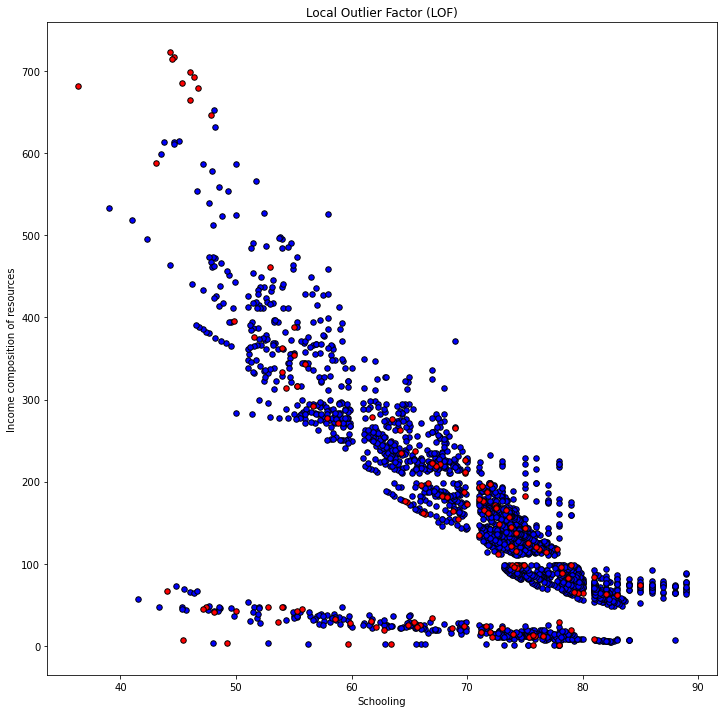

In [213]:
# A visualization of the outliers
plt.figure(figsize=(12,12))
# plot the level sets of the decision function

in_mask = [True if l == 1 else False for l in yhat]
out_mask = [True if l == -1 else False for l in yhat]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.axis('tight')
plt.xlabel('Schooling');
plt.ylabel('Income composition of resources');
plt.show()

In [214]:
from sklearn.neighbors import LocalOutlierFactor
X = df_lifeExpectancy[df_lifeExpectancy.columns[3:]].values

lof = LocalOutlierFactor()
yhat = lof.fit_predict(X)
mask = yhat != -1
X_filtered = X[mask, :]

# summarize the shape of the updated dataset
print(X.shape)
print(X_filtered.shape)

[ 1  1  1 ...  1 -1 -1]
(2288, 9)
(2153, 9)


In [ ]:
sns.scatterplot(x=df_lifeExpectancy['Year'], y=df_lifeExpectancy['Schooling'], hue=df_lifeExpectancy['Status'])
sns.scatterplot(x=df_lifeExpectancy['Year'], y=df_lifeExpectancy['Income_Composition_of_Resources'], hue=df_lifeExpectancy['Status'])

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(df_lifeExpectancy[np.isnan(df_lifeExpectancy['Schooling']) & np.isnan(df_lifeExpectancy['Income_Composition_of_Resources'])][['Year', 'Country', 'Status', 'Schooling']])